# Fine-Tuning Pre-trained Neural Networks

## Image Recognition Models Pre-Trained in Keras

1. VGG (University of Oxford)
2. ResNet50 (Microsoft)
3. Inception v3 (Google)
4. MobileNet (Google)
5. NASNet (Google)

All of the pre-trained models included are under the applications package. 

    keras.applications import *name*

### Transfer Learning
Adapt an existing model to recognize new types of objects instead of starting from scratch

---------------------

## VGG Image Recognition Pre-trained Model

Use a VGG model to classify an image. The bay.jpg image that will be loaded is too large to process directly with the neural network. When you feed images into a neural network, the size of the image need to match the number of input nodes in the neural network.

For VGG, images we need into the network need to be 224x224 pixels. Set target_size parameter to (224, 224).

### Import libraries

In [37]:
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16

### Load Keras' VGG16 model that was pre-trained against the ImageNet database

In [ ]:
model = vgg16.VGG16()

### Load the image file and resize it to 224x224 (required by the model)

In [ ]:
img = image.load_img('Images/bay.jpg', target_size=(224, 224))

### Convert the image to a numpy array

In [ ]:
x = image.img_to_array(img)

### Add a fourth dimension (Keras expects a list but we only have one image)

In [ ]:
x = np.expand_dims(x, axis=0)

### Normalize the input image's pixel values to the range used when training the neural network

When we feed images into the neural network, they always need to be normalized so that the values for each pixel are between zero and one. The vgg model has a built in normalization function called pre-process input that will do that.

In [ ]:
x = vgg16.preprocess_input(x)

### Run the image through the deep neural network to make a prediction

The predictions we get back will be the 1,000 element array of floating point numbers. Each element in the array will tell us how likely our picture contains each of the 1,000 objects the model was training to recognize.

In [ ]:
predictions = model.predict(x)
predictions

### Look up the names of the predicted classes. Index zero = result for the first image

The vgg model provides a decode predictions function that will tell us the names of the most likely matches.

In [ ]:
predicted_classes = vgg16.decode_predictions(predictions, top=9)
predicted_classes

### Print the results and likelihood of classes

In [ ]:
print('Top predictions for this image:')

for imagenet_id, name, likelihood in predicted_classes[0]:
    print('Predictions: {} - {:2f}'.format(name, likelihood))

---------------------------------------

## Transfer Learning
Using a model trained on one set of data as a starting point for modeling a new set of data

If you have a lot of training data, you can train a convolutional neural network to recognize objects and images, but here's a secret, in the real world, you almost never need to train the neural network from scratch. Instead, we can use transfer learning to reuse an existing neural network and adapt it to a new problem. 

### From One Learned Model to Another
Transfer learning is where you take a model trained on one set of data and then use the knowledge it learned to give it a headstart when solving a new problem. To understand how transfer learning works, let's take a look at how a convolutional neural network processes an image layer by layer. A typical convolutional neural network is structured like this. The network is made up of a series of convolutional layers and the training process teaches each of those layers to be activated when it sees certain patterns in the input image. 

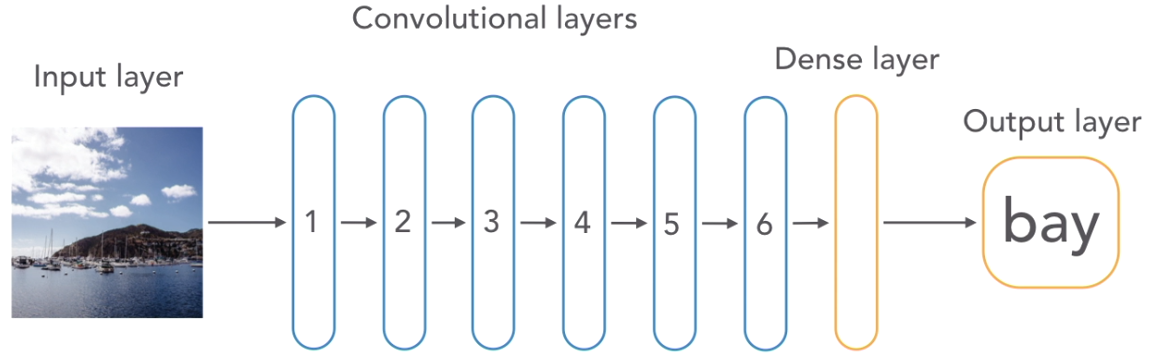

In [22]:
from PIL import Image
Image.open('Images/25-full-cnn.png')

Those layers learn to tell images apart by looking for those unique patterns. Let's look at the patterns that would activate each layer. These are the kinds of patterns that the first layer is looking for. You can see that it's looking for really basic patterns like splotches of color and lines in an image. 

Now let's go down to the second convolutional layer. The patterns are starting to look slightly more complex. Here are the images that would activate the third layer. These patterns are starting to resemble objects. The one on the right sort of looks like a hair pattern. Here are some images that would activate the fourth layer. The patterns are even more complex. The middle image almost looks like eyeballs. Let's look at one more. Here are the images that would activate the fifth layer. Now the patterns are getting very complex with curves and shapes. 

Since neural networks are really just mathematical models, it's impossible to tell exactly what each of these patterns represents, but you can see how each layer is getting more and more complex in what it's looking for. 

### Basic Idea of a Neural Network
The basic idea is that neural networks learn to detect simple patterns in the top layer, and then the next layer uses that information to look for slightly more complex patterns and so on, down through all the convolutional layers. 

But the final layer of the neural network is a densely connected layer that uses the information from the convolutional layers to decide which object is in the image. With transfer learning, we're gonna start with a neural network that's already been trained to recognize objects from a large dataset like ImageNet.

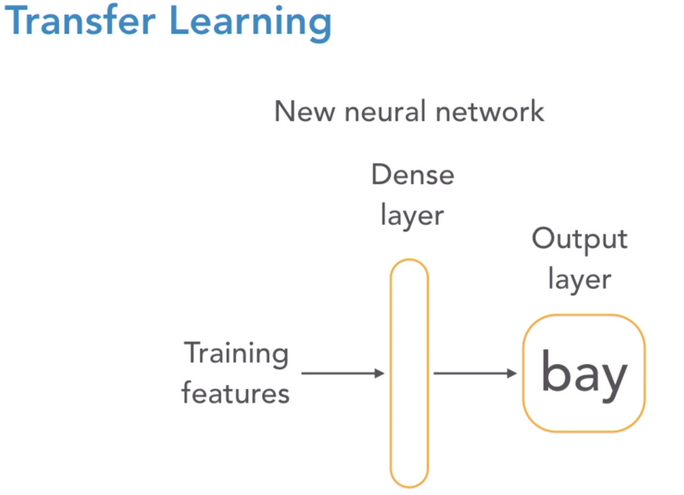

In [23]:
Image.open('Images/26-dense-transfer.png')

To reuse this neural network with new data, we can simply slice off the last layer. We'll keep all the layers that detect patterns, but remove the part that maps those patterns to specific objects. We'll call this pre-trained neural network a feature extractor because we're using it to extract training features from images. Next, we'll create a new neural network to replace the last layer in the original network. This is the only part that we'll have to train ourselves. 

When we build our new image recognition system, we'll pass our new training images through the feature extractor and save the results for each training image to a file. 

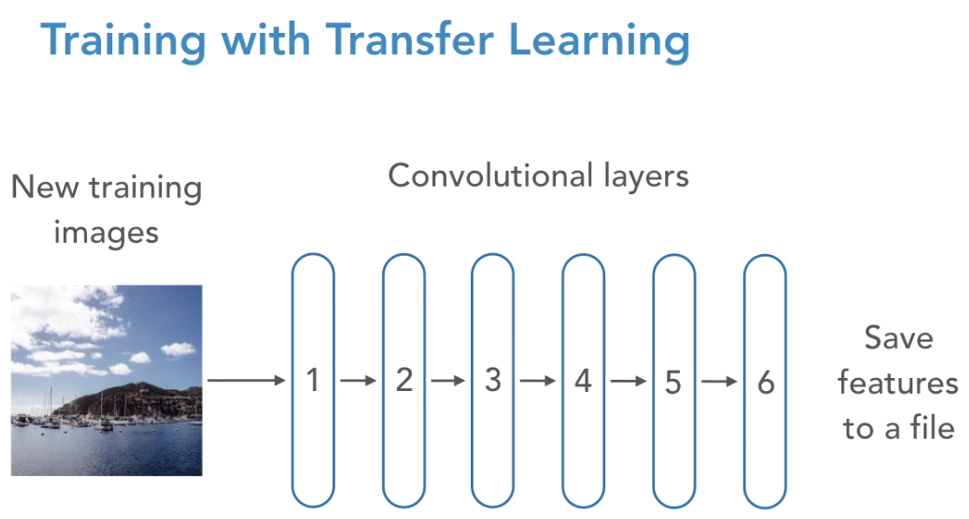

In [25]:
Image.open('Images/29-extracted-features.png')

Then, we'll use those extracted features to train the new neural network. Since we're using the feature extractor to recognize shapes and patterns, our new neural network only has to learn to tell which patterns map to which objects. Since this new neural network isn't doing much work, it can learn to do it with a small amount of training data. 

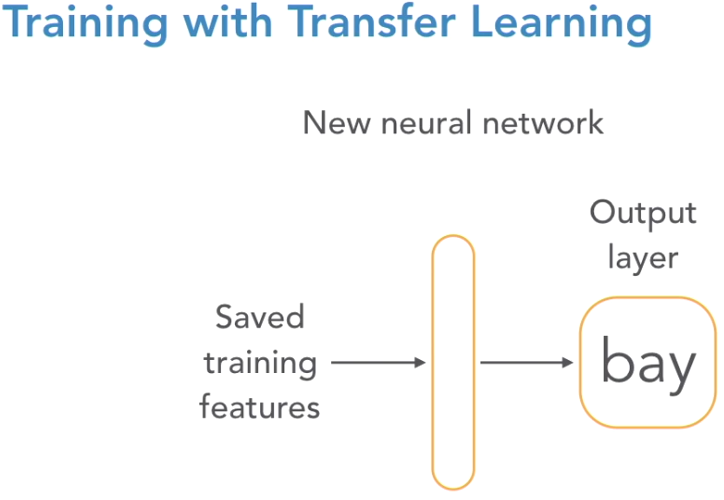

In [26]:
Image.open('Images/27-training-transfer.png')

And here's how we'll do predictions with transfer learning. When we want to test the new image, we have to first pass it through the same feature extractor. Then we can use those extracted features as input to our newly-trained neural network, which will give us the final prediction. 

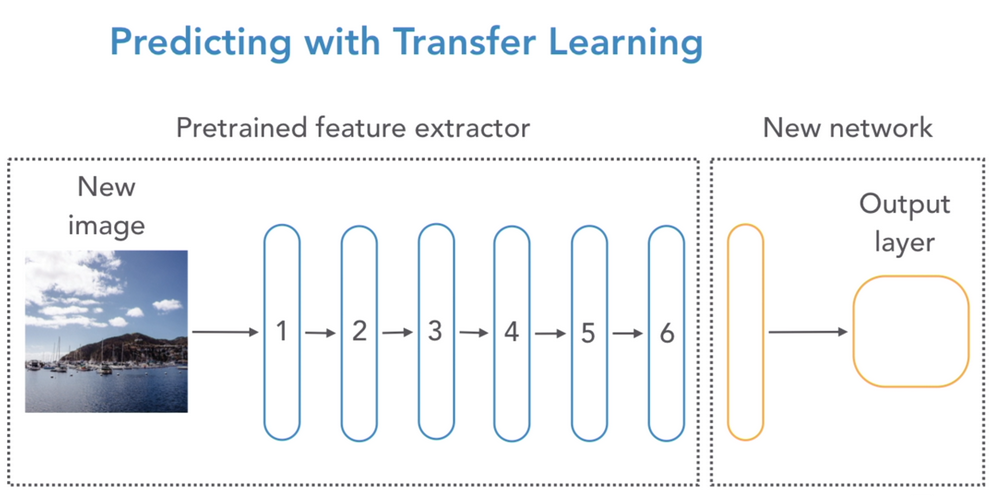

In [27]:
Image.open('Images/28-predict-transfer.png')

### When to Use Transfer Learning
- Transfer learning can cut the time required to build an image recognition system from days to minutes
- When I'm starting new projects, I almost always try transfer learning first before training a new neural network from scratch
- If transfer learning works, there's no need to do the extra work to train a new model
- Transfer learning is also really useful when you only have a small training dataset available.

Training a neural network from scratch is sort of like teaching a baby to read. The baby has to learn about letters and words and sentences before it can read and understand anything. Transfer learning is more like asking an adult that already knows how to read to learn something new. Since the adult already knows how to read, they need less material to learn a new topic. They don't need alphabet flashcards and spelling tests. The same basic idea applies to neural networks. 

### Small Dataset? Use Transfer Learning
If you only have a few hundred training images for your image recognition system, you don't have enough data to teach your model from scratch, so it makes sense to start with a model trained for something else and adapt it to your problem.

-------------

## Extracting Features w/ a Pre-Trained Neural Network

### Walk through directories

Let's use transfer learning to build an image recognition system that can identify pictures of dogs. 

[Relative Path](https://kite.com/python/examples/4293/os-get-the-relative-paths-of-all-files-and-subdirectories-in-a-directory)

In [30]:
# Training folder
training_folder = 'TrainingData/'
subfolder_dogs = '/dogs/'
subfolder_not_dogs = '/not_dogs/'

In [ ]:
import os

In [ ]:
for root, dirs, files in os.walk(training_folder):
    print(files)
#     for d in dirs:
#         print(d)
#         print(os.path.relpath(os.path.join(root, d), "."))
#     for f in files:
#         print(os.path.relpath(os.path.join(root, f), "."))

In [ ]:
os.path.relpath(os.path.join(root, d), ".")

-----------------------

## Build a Feature Extractor
The first step is to build a feature extractor that can extract training features from our images.

1. Load libraries, images, training data
2. Build a VGG model without the top layer (include_top=False)
3. Predict training data
4. Extract features and labels using joblib into a dat file

First, I have a sub-folder called dogs. These pictures are 64 by 64 pixel images from the image net dataset. If you're building your own image recognition system, you can use your own pictures of whatever kind of objects you wanna recognize instead. Next, we have a folder called "not dogs."

In [28]:
from pathlib import Path
import numpy as np
import joblib
from keras.preprocessing import image
from keras.applications import vgg16

from PIL import Image
# potato_resize = Image.open('Images/23-potato.png').resize((64,64))
# potato_resize.save('Images/23-potato-resize.png')

### Create training data path

In [31]:
# Create path to folders with training data
dog_path = Path(training_folder) / subfolder_dogs
not_dog_path = Path(training_folder) / subfolder_not_dogs

### Create empty arrays to store image array and labels

In [32]:
# Create an images and labels list to store arrays; assign 0 or 1 as labels
images = []
labels = []

### Loop through not dog path folder

In [33]:
# Loop through not-dog images (not_dog_path)
for img in not_dog_path.glob('*.png'): # return a possibly-empty list of path names that match pathname "*.png"
    
    # Load the image from disk
    img = image.load_img(img)
    
    # Convert the image to a numpy array
    image_array = image.img_to_array(img) # keras helper function to convert image into an array
    
    # Add the image to the lsit of images
    images.append(image_array) # add image appray to list of images
    
    # Add labels which is 0 for not dogs
    labels.append(0) # add 0 to label array

### Loop through dog path folder

In [34]:
# Load all the dog images
for img in dog_path.glob('*.png'):
    
    # Load the image from disk
    img = image.load_img(img)
    
    # Convert the image to a numpy array
    image_array = image.img_to_array(img)
    
    # Add the image to the list of images
    images.append(image_array)
    
    # For each dog image, the expected value should be 1
    labels.append(1)

### Create training data array (x & y)
Create an array called x_train that will have the training data. Keras expects all of our training images to be a numpy array instead of a normal Python list.

1. Create a single numpy array with all the images laoded
2. Convert the labels to a numpy array
3. Normalize from 0 to 1
4. Pre-trained neural network
5. Extract features for each image (all in one pass)
6. Save the array of extracted features to a file
7. Save the matching array of expected values to a file

In [35]:
# Create a single numpy array with all the images
x_train = np.array(images)

In [36]:
# Convert labels to a numpy array as well
y_train = np.array(labels)

### Normalize training data

Need to normalize our training dataset so all the pixel values are in the zero to one range

In [ ]:
x_train = vgg16.preprocess_input(x_train)

### Load a pre-trained neural network to use as a feature extractor

Create a VGG16 object (pre-trained). Our training images are 64 pixels by 64 pixels with three color channels, one for red, one for green, and one for blue.

In [ ]:
# Load a pre-trained neural network to extract features; remove last layer of the neural network
pretrained_nn = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3)) 

### Extract features for each image (all in one pass)

Features x array will now contain the set of features that represent each of the training images in our dataset.

In [ ]:
# Extract features for each image
features_x = pretrained_nn.predict(x_train)

### Save the array of extracted features to a file

Save the features to disk. Use dump() from joblib for writing an array to disk.

In [ ]:
# Save features array
joblib.dump(features_x, 'x_train.dat')

### Save the matching array of expected values to a file

In [ ]:
# Save expected valuess array
joblib.dump(y_train, 'y_train.dat')

These files contain the features and labels that represent our training data. 

## Extraction Complete End Here Before New Model

-------------------------------

## Training a New Neural Network w/ Extracted Features (Load)
We've used the pre trained neural network to extract features from our training images. Now we're ready to train a new neural network that uses those extracted features.

### Differences
The code is exactly like training any other neural network but with two small differences. 
1. The first difference is how we load our training data Instead of loading raw images to train with, we're gonna load the features that we extracted with the pre trained VGG 16 neural network. If you look at the file list on the left, you can see that we already have our extracted features stored in a file called x train.dat and our labels stored in a file called y train.dat.

2. The second difference is in how we define our layers. Since we use VGG 16 to extract features from our image, this neural network has no convolutional layers. Instead it only has the final dense layers of the neural network. These are the only layers that we'll be retraining.

### Load training dat file

In [ ]:
# Load data set
x_train = joblib.load('x_train.dat')
y_train = joblb.load('y_train.dat')

### Create a model and add layers

In [ ]:
### Create a model and add layers
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [ ]:
# Compile
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Fit the model

In [ ]:
# Train the model
model.fit(
    x_train,
    y_train,
    epochs=1,
    shuffle=True
)

### Save the neural network structure

In [ ]:
# Save neural network structure
transfer_model_structure = model.to_json()
f = Path('transfer_model_structure.json')
f.write_text(transfer_model_structure)

### Save neural network's trained weights

In [ ]:
# Save neural network's trained weights
model.save_weights('transfer_model_weights.h5')

-------------

## Make Predictions with Transfer Learning

We have used the pre-trained models, extracted features, created a new model that will train the dense layers, extracted the structure and trained weights using the combination of the two. Now we will make predictions on new data.

This code is exactly the same as the code we'd use to make predictions with the standard neural network. There's just one key change. We'll need the pre-processor image with the vgg16 feature extractor. 

First, we can see that we're loading the structure of the neural network.

In [ ]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from keras.applications import vgg16

# Load the json file that contains the transfer model structure
f = Path('transfer_model_structure.json')
model_structure = f.read_text()

# Recreate the Keras model object from the json daa
model = model_from_json(model_structure)

# Re-load the transfer model's trained weights
model.load_weights('transfer_model_weights.h5')

# Load an image file to test and resize it to 64x64
img = image.load_img('Images/23-potato.png', target_size=(64, 64))

# Convert the image to a numpy array
image_array = image.img_to_array(img)

# Add a forth dimension to the image
images = np.expand_dims(image_array, axis=0)

# Normalize the data
images = vgg16.preprocess_input(images)

# Use the pre-trained neural network to extract features from the test image
feature_extraction_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
features = feature_extraction_model.predict(images)

# Given the extracted features, make a final prediction using the model
results = model.predict(features)

# Check first result since we only have one image
single_result = results[0][0]

# Print the result
print("Likelihood that this image contains a dog: {}%".format(int(single_result * 100)))

Image.open('Images/23-potato.png')

------------